In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

### Import des données

On vérifie qu'on est au bon endroit

In [2]:
!pwd

/Users/louisedry/Desktop/IODAA/projets_guigue/classif


Import des données

In [3]:
data = pd.read_csv("raw_data.csv", sep=";", index_col=0)

In [4]:
data.shape

(7197, 1003)

In [5]:
data

,cell_name,cell_type,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
patient_name,,,,,,,,,,,,,,,,,,,,,
P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,52.119610,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,58.639653,...,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2.0
P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,61.320470,...,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,1.0
P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,53.734999,...,316.498420,323.193044,321.317859,310.282294,326.497336,339.002563,345.054206,372.404114,414.603390,2.0
P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,51.591270,54.161436,63.649577,58.364222,61.095665,47.811723,62.009418,...,324.027328,320.147621,318.339477,310.159782,313.315257,333.873758,339.270424,352.541981,351.914705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1_ULC156,P1_ULC156_M1_L1_ROI2_C43,TNK,sain,79.899533,106.561057,113.545793,116.775563,108.161449,96.394401,99.913804,...,353.242721,342.554395,338.234888,349.217179,354.196203,357.833444,369.658252,378.589869,394.833234,3.0
P1_ULC156,P1_ULC156_M1_L1_ROI2_C43,TNK,sain,86.579106,64.318268,53.031208,60.351759,73.065302,72.644425,90.110192,...,336.118073,345.712805,338.797810,339.772543,345.702042,353.963123,356.027565,351.790370,342.570314,1.0
P1_ULC156,P1_ULC156_M1_L1_ROI2_C44,B,sain,86.193622,67.082583,62.158704,66.058526,76.819090,76.931321,94.071141,...,340.361834,348.195007,342.144712,357.687618,361.788879,362.309974,358.883856,355.593313,357.331293,1.0


In [6]:
data["patient_state"] = pd.factorize(data["patient_state"])[0]

### Analyse descriptive des données

In [7]:
sum(data["cell_type"]=='B')/len(data)

0.40405724607475335

Observation : répartition à 40/60 de cellules cancérigènes, donc pas de pb de déséquilibrage

In [8]:
print("Nombre de patients : ", len(data.index.unique()))

Nombre de patients :  33


In [9]:
print("Nombre de cellules : ", len(data["cell_name"].unique()))

Nombre de cellules :  2568


In [10]:
nbr_cellules_ppatient = dict()
for patient in data.index.unique():
    nb_cellules = len(data[data.index==patient].loc[:,"cell_name"].unique())
    nbr_cellules_ppatient[patient] = nb_cellules

In [11]:
print(nbr_cellules_ppatient)

{'P2_ULC80': 54, 'P2_ULC81': 66, 'P1_ULC86': 55, 'P1_ULC87': 40, 'P2_ULC88': 65, 'P1_ULC89': 63, 'P1_ULC91': 80, 'P2_ULC93': 58, 'P1_ULC95': 62, 'P2_ULC96': 70, 'P1_ULC98': 67, 'P2_ULC99': 47, 'P1_ULC100': 61, 'P1_ULC101': 64, 'P2_ULC102': 47, 'P1_ULC103': 35, 'P1_ULC106': 33, 'P1_ULC127': 72, 'P2_ULC128': 107, 'P2_ULC129': 75, 'P1_ULC133': 130, 'P2_ULC135': 53, 'P1_ULC137': 95, 'P1_ULC138': 151, 'P2_ULC139': 71, 'P2_ULC142': 95, 'P1_ULC144': 130, 'P2_ULC146': 126, 'P1_ULC147': 137, 'P1_ULC148': 125, 'P2_ULC149': 80, 'P1_ULC151': 82, 'P1_ULC156': 72}


In [12]:
print("Nombre moyen de cellules par patient : ", sum(nbr_cellules_ppatient.values())/len(nbr_cellules_ppatient))
print("Nombre minimum de cellules par patient : ", min(nbr_cellules_ppatient.values()))
print("Nombre maximum de cellules par patient : ", max(nbr_cellules_ppatient.values()))

Nombre moyen de cellules par patient :  77.81818181818181
Nombre minimum de cellules par patient :  33
Nombre maximum de cellules par patient :  151


In [13]:
# on trouve le taux de cellule B par patient
treshold = pd.DataFrame(columns=('patient_name', 'taux_cellules_B', 'patient_state'))
to_concat=[]
for patient in (data.index.unique()):
    data_patient = data[data.index==patient]
    data.loc[patient,"taux_cellules_B"] = (sum(data_patient.loc[:,"cell_type"]=='B')/len(data_patient))
    df = pd.DataFrame({'patient_name': patient, 'taux_cellules_B': data.loc[patient,"taux_cellules_B"][0], 'patient_state':data.loc[patient, "patient_state"][0]}, index=["id"])
    to_concat.append(df)
    treshold = pd.concat(to_concat, axis=0)

In [14]:
taux_reel = treshold.sort_values(by="taux_cellules_B")
treshold.sort_values(by="taux_cellules_B").to_csv("taux_reel_ppatient.csv", sep='\t', header=True)

In [15]:
treshold["patient_state"] = treshold["patient_state"].astype('category')
treshold.dtypes

patient_name         object
taux_cellules_B     float64
patient_state      category
dtype: object

Text(0, 0.5, 'Taux de cellules B pour un patient')

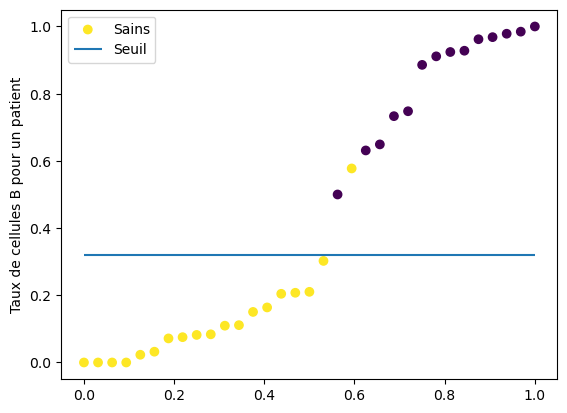

In [16]:
plt.figure()
plt.scatter(x=np.linspace(0,1,33),y=taux_reel["taux_cellules_B"], c=taux_reel["patient_state"])
plt.hlines(y=0.32, xmin=0, xmax=1)
plt.legend(["Sains","Seuil"])
plt.ylabel("Taux de cellules B pour un patient")

On peut estimer une limite à 32% de cellules B. La personne qualifiée saine avec plus de 32% de cellules B peut être soit une aberration, soit un individu dont trop peu de spectres de cellules saines ont été retenus / trop peu de cellules saines ont été observées et qui a été classé malade mais diagnostiqué sain par la suite.

La limite pourrait être plus haute, mais il s'agit d'un problème de santé et il vaut donc mieux être trop prudent et sur-estimer le nombre de patients malades que le sous-estimer.

#### Observations de quelques histogrammes de longueurs d'ondes

Text(0, 0.5, "Quantité de longueur d'onde 845 à la valeur x")

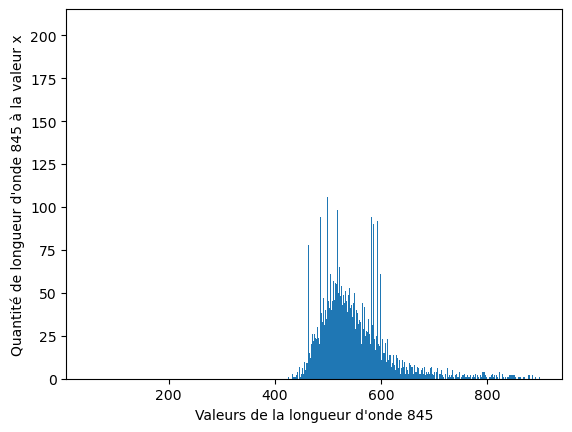

In [17]:
plt.figure()
plt.hist(data["lambda_845"], range(50,900))
plt.xlabel("Valeurs de la longueur d'onde 845")
plt.ylabel("Quantité de longueur d'onde 845 à la valeur x")

Text(0, 0.5, "Quantité de longueur d'onde 10 à la valeur x")

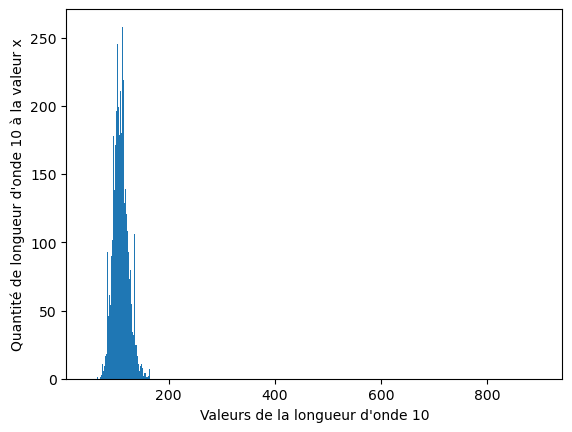

In [18]:
plt.figure()
plt.hist(data["lambda_10"], range(50,900))
plt.xlabel("Valeurs de la longueur d'onde 10")
plt.ylabel("Quantité de longueur d'onde 10 à la valeur x")

On a des histogrammes très différents selon les cas, la longueur d'onde 10 semble très peu varier selon les cas (déviation standard faible) donc apporte potentiellement peu d'informations, tandis que la longueur d'onde 845 varie beaucoup plus.

### Sélection de spectres pour les cellules qui en ont plusieurs 

On observe qu'une cellule peut avoir jusqu'à 3 spectres différents, or on aurait besoin d'un seul spectre par cellule. Comme on n'a pas d'estimation de quel spectre est le meilleur, on prend le maximum de chaque signal pour chaque longueur d'onde, pour être sûr de ne manquer ou n'aplatir aucun pic (ce que l'on ferait si on faisait une moyenne par exemple). 

In [159]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

spectres_pcell = pd.DataFrame(columns = data.columns)
for cell in data["cell_name"].unique():
    df = pd.DataFrame(np.max(data[data['cell_name'] == cell])).T
    spectres_pcell = pd.concat([spectres_pcell, df])

new_idx = [str(cell.split("_")[0])+"_"+str(cell.split("_")[1]) for cell in spectres_pcell['cell_name']]

spectres_pcell["patient_name"] = new_idx
spectres_pcell = spectres_pcell.set_index("patient_name")

In [160]:
data = spectres_pcell

On recueille les informations dans un tableau avec : données normalisées ou non, ACP ou non, modèle

In [162]:
resultats = pd.DataFrame(columns=['Normalise', 'ACP', 'RegLog', 'LinearSVC', 'XGBoost'])

In [163]:
resultats["Normalise"] = [0,1,0,1]
resultats["ACP"] = [0,0,1,1]

In [164]:
resultats

,Normalise,ACP,RegLog,LinearSVC,XGBoost
0,0,0,NaN,NaN,NaN
1,1,0,NaN,NaN,NaN
2,0,1,NaN,NaN,NaN
3,1,1,NaN,NaN,NaN


### Preprocessing

#### Test des modèles sans normaliser et sans faire d'ACP

In [165]:
X = data.filter(regex='^lambda', axis=1)
X = X.astype('float')
Y = pd.DataFrame(data, columns=["cell_type"])

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [170]:
from sklearn.preprocessing import OneHotEncoder

Yscaler = OneHotEncoder(sparse=False)
Ynew_train = Yscaler.fit_transform(y_train)[:,0]
Ynew_test = Yscaler.fit_transform(y_test)[:,0]
Y = Yscaler.fit_transform(Y)[:,0]

In [171]:
mod = LogisticRegression(C=1e-8) # C fixé très bas car problème de convergence si non
mod.fit(X_train, Ynew_train)
mod.predict(X_test)
mod.score(X_test, Ynew_test)

cv_results = cross_val_score(mod, X, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['RegLog'][0] = cv_results.mean()

[0.55836576 0.57976654 0.58949416 0.60818713 0.59259259] 0.5856812372478971


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/44975584.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['RegLog'][0] = cv_results.mean()


In [172]:
mod = LinearSVC(C=1e-8)
mod.fit(X_train, Ynew_train)
mod.predict(X_test)
mod.score(X_test, Ynew_test)

cv_results = cross_val_score(mod, X, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['LinearSVC'][0] = cv_results.mean()

[0.55836576 0.60700389 0.57003891 0.63157895 0.57699805] 0.5887971116723932


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/3348609085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['LinearSVC'][0] = cv_results.mean()


In [173]:
mod = XGBClassifier()
mod.fit(X_train, Ynew_train)
mod.predict(X_test)
mod.score(X_test, Ynew_test)

cv_results = cross_val_score(mod, X, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['XGBoost'][0] = cv_results.mean()

[0.70622568 0.71400778 0.74513619 0.69980507 0.74463938] 0.7219628188499784


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/4098955998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['XGBoost'][0] = cv_results.mean()


#### Test des modèles sans normaliser avec ACP

Boucle sur le nombre de composantes de l'ACP pour trouver où est la meilleure performance.

In [174]:
from sklearn.decomposition import PCA

resultats_LogReg = []
resultats_LinearSVC = []
resultats_XGB = []
nbr_components = []

LogReg = LogisticRegression(C=1e-8)
svc = LinearSVC(C=1e-8)
xgb = XGBClassifier()

for components in range(999,10,-100):
    nbr_components.append(components)
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X)

    resultats_LogReg.append(cross_val_score(LogReg, X_pca, Y, cv=5, scoring='accuracy').mean())

    resultats_LinearSVC.append(cross_val_score(svc, X_pca, Y, cv=5, scoring='accuracy').mean())

    resultats_XGB.append(cross_val_score(xgb, X_pca, Y, cv=5, scoring='accuracy').mean())

In [175]:
resultats_LogReg = list(reversed(resultats_LogReg))
resultats_LinearSVC = list(reversed(resultats_LinearSVC))
resultats_XGB = list(reversed(resultats_XGB))
nbr_components = list(reversed(nbr_components))

In [176]:
print("Performance idéale de RegLog : " + str(max(resultats_LogReg)) + " pour " + str(nbr_components[np.argmax(resultats_LogReg)]) + " composantes dans l'ACP")
print("Performance idéale de LinearSVC : " + str(max(resultats_LinearSVC)) + " pour " + str(nbr_components[np.argmax(resultats_LinearSVC)]) + " composantes dans l'ACP")
print("Performance idéale de XGBoost : " + str(max(resultats_XGB)) + " pour " + str(nbr_components[np.argmax(resultats_XGB)]) + " composantes dans l'ACP")

Performance idéale de RegLog : 0.5864602058540211 pour 99 composantes dans l'ACP
Performance idéale de LinearSVC : 0.5470923309137521 pour 99 composantes dans l'ACP
Performance idéale de XGBoost : 0.6814374890967149 pour 99 composantes dans l'ACP


Text(0, 0.5, 'Performance du modèle')

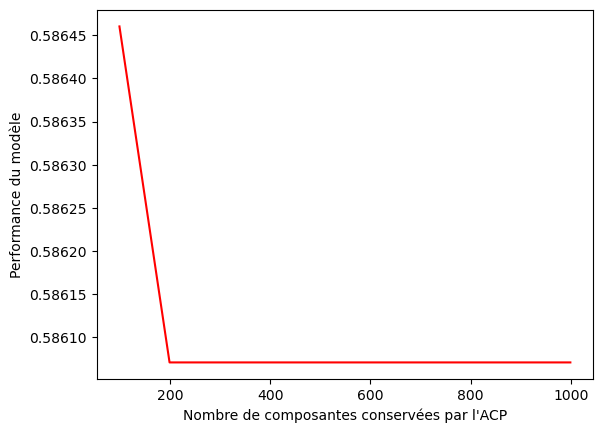

In [177]:
plt.plot(nbr_components, resultats_LogReg, 'r')
plt.xlabel("Nombre de composantes conservées par l'ACP")
plt.ylabel("Performance du modèle")

Text(0, 0.5, 'Performance du modèle')

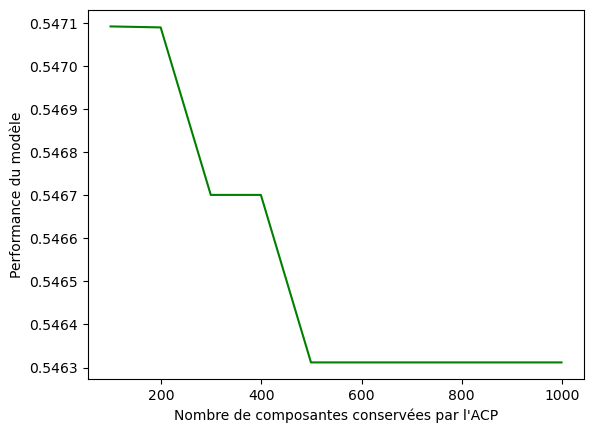

In [178]:
plt.plot(nbr_components, resultats_LinearSVC, 'g')
plt.xlabel("Nombre de composantes conservées par l'ACP")
plt.ylabel("Performance du modèle")

Text(0, 0.5, 'Performance du modèle')

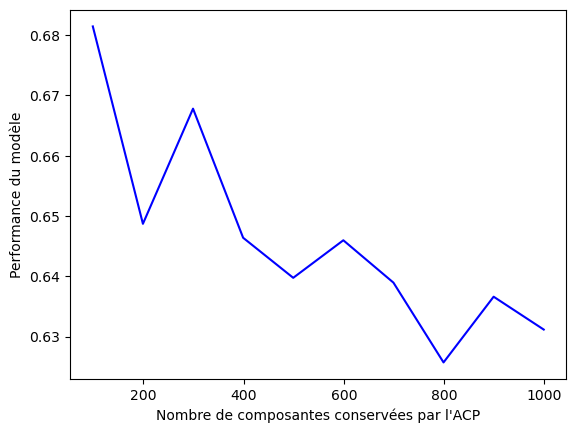

In [179]:
plt.plot(nbr_components, resultats_XGB, 'b')
plt.xlabel("Nombre de composantes conservées par l'ACP")
plt.ylabel("Performance du modèle")

On applique les modèles vus avec le nombre de dimensions amenant à la meilleure accuracy.

In [180]:
pca1 = PCA(n_components=nbr_components[np.argmax(resultats_LinearSVC)])
X_pca = pca1.fit_transform(X)
cv_results = cross_val_score(svc, X_pca, Y, cv=5, scoring='accuracy')
resultats['LinearSVC'][2] = cv_results.mean()

pca2 = PCA(n_components=nbr_components[np.argmax(resultats_LogReg)])
X_pca = pca2.fit_transform(X)
cv_results = cross_val_score(LogReg, X_pca, Y, cv=5, scoring='accuracy')
resultats['RegLog'][2] = cv_results.mean()


pca3 = PCA(n_components=nbr_components[np.argmax(resultats_XGB)])
X_pca = pca3.fit_transform(X)
cv_results = cross_val_score(xgb, X_pca, Y, cv=5, scoring='accuracy')
resultats['XGBoost'][2] = cv_results.mean()

/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/2594662159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['LinearSVC'][2] = cv_results.mean()
/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/2594662159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['RegLog'][2] = cv_results.mean()
/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/2594662159.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [181]:
resultats

,Normalise,ACP,RegLog,LinearSVC,XGBoost
0,0,0,0.585681,0.588797,0.721963
1,1,0,NaN,NaN,NaN
2,0,1,0.58646,0.547092,0.674822
3,1,1,NaN,NaN,NaN


#### Test des modèles en normalisant les X

In [182]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
Xscaled_train = X_scaler.fit_transform(X_train)
Xscaled_test = X_scaler.fit_transform(X_test)
X_scaled = X_scaler.fit_transform(X)

In [183]:
mod = LogisticRegression(C=1e-8)
mod.fit(Xscaled_train, Ynew_train)
mod.score(Xscaled_test, Ynew_test)

cv_results = cross_val_score(mod, X_scaled, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['RegLog'][1] = cv_results.mean()

[0.57976654 0.57976654 0.58171206 0.58089669 0.58089669] 0.5806077017012917


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/3856396346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['RegLog'][1] = cv_results.mean()


In [184]:
mod = LinearSVC(C=1e-8)
mod.fit(Xscaled_train, Ynew_train)
mod.score(Xscaled_test, Ynew_test)

cv_results = cross_val_score(mod, X_scaled, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['LinearSVC'][1] = cv_results.mean()

[0.53696498 0.68871595 0.5233463  0.52826511 0.46003899] 0.5474662661842673


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/521090556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['LinearSVC'][1] = cv_results.mean()


In [185]:
mod = XGBClassifier()
mod.fit(Xscaled_train, Ynew_train)
mod.score(Xscaled_test, Ynew_test)

cv_results = cross_val_score(mod, X_scaled, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['XGBoost'][1] = cv_results.mean()

[0.70622568 0.71400778 0.74513619 0.69980507 0.74463938] 0.7219628188499784


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/864471367.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['XGBoost'][1] = cv_results.mean()


In [186]:
resultats

,Normalise,ACP,RegLog,LinearSVC,XGBoost
0,0,0,0.585681,0.588797,0.721963
1,1,0,0.580608,0.547466,0.721963
2,0,1,0.58646,0.547092,0.674822
3,1,1,NaN,NaN,NaN


#### Test des modèles avec ACP sur les données normalisées

In [187]:
resultats_LogReg = []
resultats_LinearSVC = []
resultats_XGB = []
nbr_components = []

LogReg = LogisticRegression(C=1e-8)
svc = LinearSVC(C=1e-8)
xgb = XGBClassifier()

for components in range(999,10,-100):
    nbr_components.append(components)
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X_scaled)

    resultats_LogReg.append(cross_val_score(LogReg, X_pca, Y, cv=5, scoring='accuracy').mean())

    resultats_LinearSVC.append(cross_val_score(svc, X_pca, Y, cv=5, scoring='accuracy').mean())

    resultats_XGB.append(cross_val_score(xgb, X_pca, Y, cv=5, scoring='accuracy').mean())

In [188]:
resultats_LogReg = list(reversed(resultats_LogReg))
resultats_LinearSVC = list(reversed(resultats_LinearSVC))
resultats_XGB = list(reversed(resultats_XGB))
nbr_components = list(reversed(nbr_components))

In [189]:
print("Performance idéale de RegLog : " + str(max(resultats_LogReg)) + " pour " + str(nbr_components[np.argmax(resultats_LogReg)]) + " composantes dans l'ACP")
print("Performance idéale de LinearSVC : " + str(max(resultats_LinearSVC)) + " pour " + str(nbr_components[np.argmax(resultats_LinearSVC)]) + " composantes dans l'ACP")
print("Performance idéale de XGBoost : " + str(max(resultats_XGB)) + " pour " + str(nbr_components[np.argmax(resultats_XGB)]) + " composantes dans l'ACP")

Performance idéale de RegLog : 0.5806077017012917 pour 99 composantes dans l'ACP
Performance idéale de LinearSVC : 0.5486350983381497 pour 99 composantes dans l'ACP
Performance idéale de XGBoost : 0.6755993962424436 pour 99 composantes dans l'ACP


Text(0, 0.5, 'Performance du modèle')

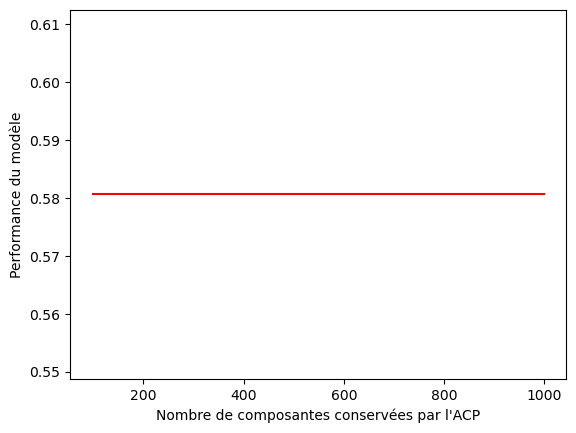

In [190]:
plt.figure()
plt.plot(nbr_components, resultats_LogReg, 'r')
plt.xlabel("Nombre de composantes conservées par l'ACP")
plt.ylabel("Performance du modèle")

Text(0, 0.5, 'Performance du modèle')

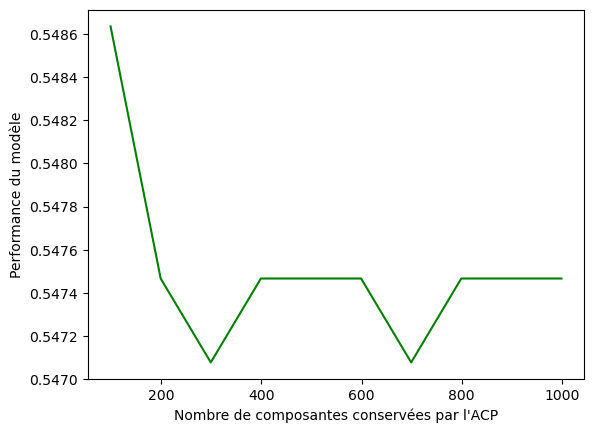

In [191]:
plt.plot(nbr_components, resultats_LinearSVC, 'g')
plt.xlabel("Nombre de composantes conservées par l'ACP")
plt.ylabel("Performance du modèle")

Text(0, 0.5, 'Performance du modèle')

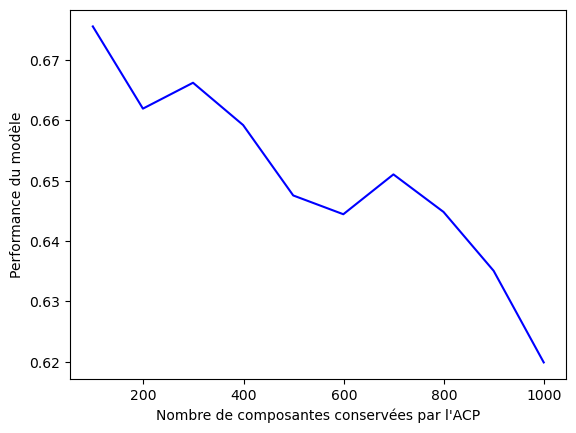

In [192]:
plt.plot(nbr_components, resultats_XGB, 'b')
plt.xlabel("Nombre de composantes conservées par l'ACP")
plt.ylabel("Performance du modèle")

In [193]:
pca1 = PCA(n_components=nbr_components[np.argmax(resultats_LinearSVC)])
X_pca = pca1.fit_transform(X_scaled)
cv_results = cross_val_score(svc, X_pca, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['LinearSVC'][3] = cv_results.mean()


pca2 = PCA(n_components=nbr_components[np.argmax(resultats_LogReg)])
X_pca = pca2.fit_transform(X_scaled)
cv_results = cross_val_score(LogReg, X_pca, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['RegLog'][3] = cv_results.mean()


pca3 = PCA(n_components=nbr_components[np.argmax(resultats_XGB)])
X_pca = pca3.fit_transform(X_scaled)
cv_results = cross_val_score(xgb, X_pca, Y, cv=5, scoring='accuracy')
print(cv_results, cv_results.mean())
resultats['XGBoost'][3] = cv_results.mean()

[0.53891051 0.68871595 0.5233463  0.53021442 0.4619883 ] 0.5486350983381497


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/1343228604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['LinearSVC'][3] = cv_results.mean()


[0.57976654 0.57976654 0.58171206 0.58089669 0.58089669] 0.5806077017012917


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/1343228604.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['RegLog'][3] = cv_results.mean()


[0.70622568 0.72762646 0.68287938 0.63352827 0.6588694 ] 0.6818258356656882


/var/folders/nm/r_5kq7j14xq_bz03cfnpmnq00000gn/T/ipykernel_2524/1343228604.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultats['XGBoost'][3] = cv_results.mean()


In [194]:
resultats

,Normalise,ACP,RegLog,LinearSVC,XGBoost
0,0,0,0.585681,0.588797,0.721963
1,1,0,0.580608,0.547466,0.721963
2,0,1,0.58646,0.547092,0.674822
3,1,1,0.580608,0.548635,0.681826


Conclusion : la meilleure solution est de normaliser et faire une ACP en utilisant XGBoost.

### Boosting des hyperparamètres du modèle

In [195]:
from sklearn.model_selection import RandomizedSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [196]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='accuracy', n_jobs=4, verbose=3, random_state=1001 )

In [197]:
random_search.fit(X_train, Ynew_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 4/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   7.0s
[CV 2/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   7.0s
[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   7.1s
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   7.1s
[CV 5/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0; total time=   6.8s
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   7.5s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   7.4s
[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6; total time=   7.5s
[CV 4/5] END colsample_bytree=0.8, gamma=1.5, 

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           monotone_constraints=None,
                                           n

In [198]:
print(random_search.best_estimator_)
print(random_search.best_params_)
print(random_search.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 1.0}
0.7930232558139535


Une fois qu'on a un modèle qui prédit correctement si les cellules sont des cellules B ou non, il faut compter le nombre de cellules B par individus et le normaliser par le nombre total de cellules qu'on a pour cet individu. Donc récupérer les prédictions, sur quelles cellules elles sont faites et à qui sont ces cellules

In [199]:
mod = random_search.best_estimator_

pca = PCA(n_components=nbr_components[np.argmax(resultats_XGB)])
X_pca = pca.fit(X_scaled)
X_train_pca = pca.transform(Xscaled_train)
X_test_pca = pca.transform(Xscaled_test)

mod.fit(X_train_pca, Ynew_train)
prediction = mod.predict(X_test_pca)
mod.score(X_test_pca, Ynew_test)

0.7794811320754716

Text(0, 0.5, "Estimation relative de l'importance de la longueur d'onde selon l'ACP")

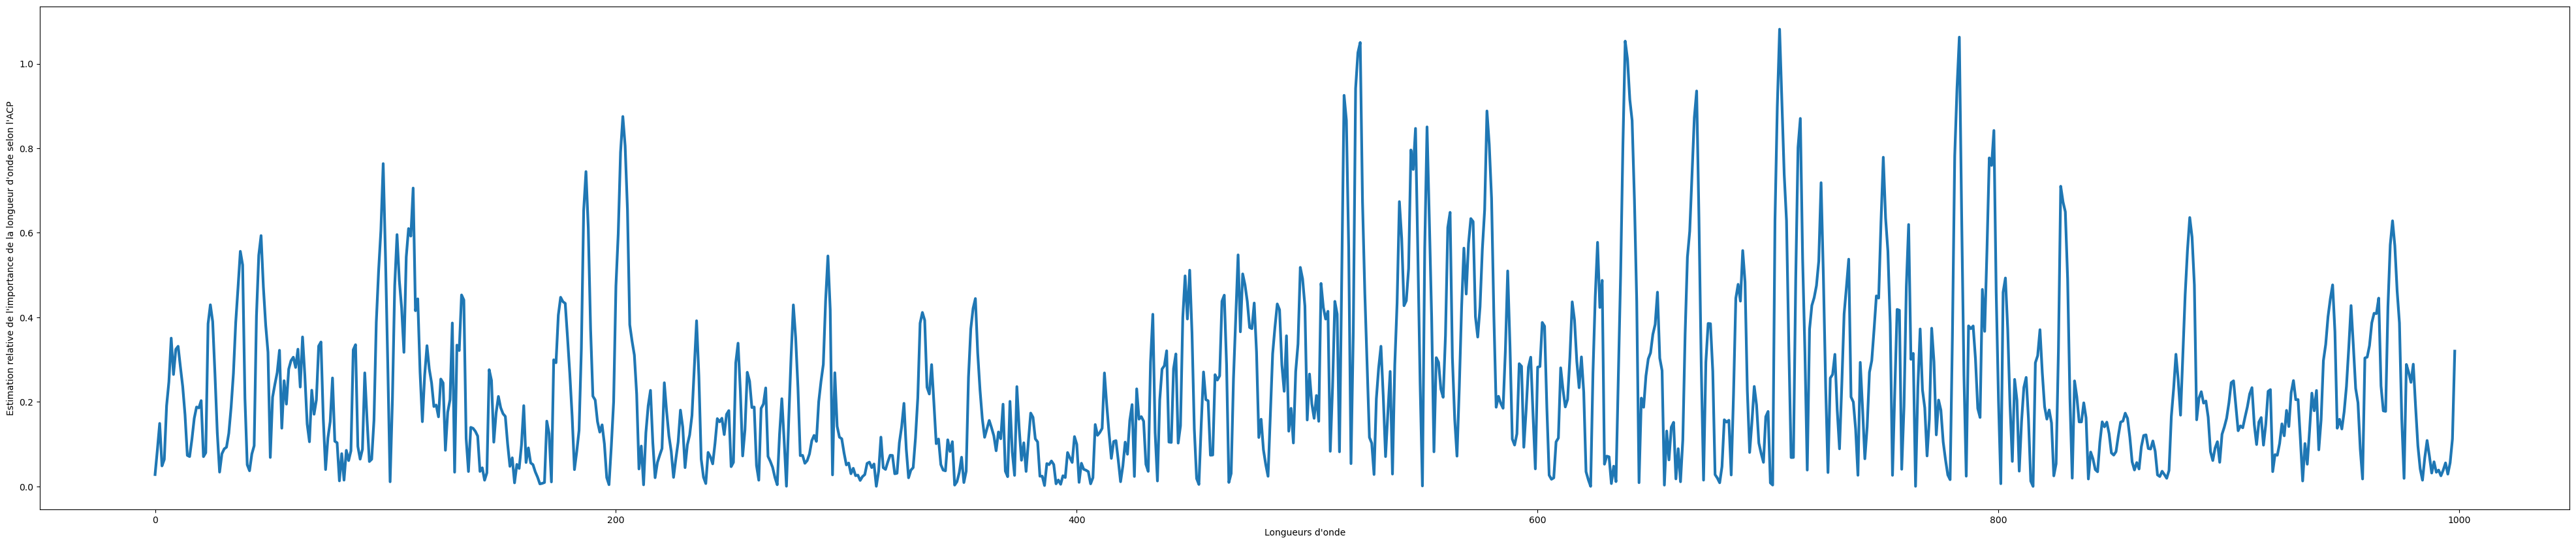

In [200]:
plt.figure(figsize=(50,10))
plt.plot(np.abs(sum(pca.components_)), linewidth=3)
plt.xlabel("Longueurs d'onde")
plt.ylabel("Estimation relative de l'importance de la longueur d'onde selon l'ACP")

In [201]:
data_pred = y_test
data_pred["cell_type"] = prediction

In [202]:
taux_final = pd.DataFrame(columns=('patient_name', 'taux_cellules_B'))
to_concat=[]

for patient in (data_pred.index.unique()):
    nb_test = sum(data_pred.loc[patient,'cell_type'] == 1)
    tx_test = nb_test/len(data_patient)

    nb_train = sum(y_train.loc[patient,"cell_type"]=='B') # et on regarde si ce sont des cellules B

    tx = (nb_test + nb_train)/len(data[data.index==patient]) # on additionne le tout 
    
    df = pd.DataFrame({'patient_name':patient, 'taux_cellules_B':tx}, index=['id'])
    to_concat.append(df)
    taux_final = pd.concat(to_concat, axis=0)


In [203]:
taux_final.loc[taux_final['taux_cellules_B'] > 0.5, 'diagnostic'] = 'malade'
taux_final.loc[taux_final['taux_cellules_B'] <= 0.5, 'diagnostic'] = 'sain'

In [204]:
taux_final

,patient_name,taux_cellules_B,diagnostic
id,P1_ULC98,0.029851,sain
id,P2_ULC88,0.938462,malade
id,P1_ULC151,0.146341,sain
id,P1_ULC103,0.085714,sain
id,P1_ULC91,0.000000,sain
id,P1_ULC148,0.056000,sain
id,P2_ULC99,0.978723,malade
id,P1_ULC138,0.225166,sain
id,P1_ULC87,0.150000,sain
id,P2_ULC146,0.825397,malade


In [205]:
data_reel = pd.DataFrame(columns=taux_final.columns)
to_concat = []
for patient in taux_final['patient_name']:
    state = data[data.index==patient].loc[:,'patient_state'][0]
    taux = data[data.index==patient].loc[:,'taux_cellules_B'][0]
    df = pd.DataFrame({'patient_name':patient, 'taux_cellules_B':taux, 'diagnostic':state}, index=['id'])
    to_concat.append(df)
    data_reel = pd.concat(to_concat, axis=0)

In [206]:
data_reel

,patient_name,taux_cellules_B,diagnostic
id,P1_ULC98,0.032086,1
id,P2_ULC88,0.978417,0
id,P1_ULC151,0.207469,1
id,P1_ULC103,0.000000,1
id,P1_ULC91,0.000000,1
id,P1_ULC148,0.071625,1
id,P2_ULC99,0.968254,0
id,P1_ULC138,0.302273,1
id,P1_ULC87,0.150442,1
id,P2_ULC146,0.911111,0


In [207]:
taux_final['real_diagnostic'] = data_reel['diagnostic']
taux_final['taux_reel'] = data_reel['taux_cellules_B']

taux_final['is_diff'] = (taux_final['diagnostic'] != taux_final['real_diagnostic']).factorize()[0]
taux_final['diff_taux'] = (np.abs(taux_final['taux_reel']-taux_final['taux_cellules_B']))

In [208]:
taux_final

,patient_name,taux_cellules_B,diagnostic,real_diagnostic,taux_reel,is_diff,diff_taux
id,P1_ULC98,0.029851,sain,1,0.032086,0,0.002235
id,P2_ULC88,0.938462,malade,0,0.978417,0,0.039956
id,P1_ULC151,0.146341,sain,1,0.207469,0,0.061127
id,P1_ULC103,0.085714,sain,1,0.000000,0,0.085714
id,P1_ULC91,0.000000,sain,1,0.000000,0,0.000000
id,P1_ULC148,0.056000,sain,1,0.071625,0,0.015625
id,P2_ULC99,0.978723,malade,0,0.968254,0,0.010469
id,P1_ULC138,0.225166,sain,1,0.302273,0,0.077107
id,P1_ULC87,0.150000,sain,1,0.150442,0,0.000442
id,P2_ULC146,0.825397,malade,0,0.911111,0,0.085714


In [209]:
taux_final.to_csv("taux_final_ppatient.csv", sep='\t', header = True) ### ici certains patients font aussi partie du training donc il faut vérifier s'ils n'ont pas d'autres cellules qui ne sont pas rentrées dans le test

Comparaison avec les données initiales

In [210]:
to_replace = {'malade':0, 'sain':1}
taux_final['diagnostic'] = taux_final['diagnostic'].replace(to_replace)

In [211]:
taux_final = taux_final.sort_values(by='taux_cellules_B')
taux_final['real_diagnostic'] = taux_reel['patient_state']

taux_final['is_diff'] = (taux_final['diagnostic'] != taux_final['real_diagnostic']).factorize()[0]

In [212]:
taux_final

,patient_name,taux_cellules_B,diagnostic,real_diagnostic,taux_reel,is_diff,diff_taux
id,P1_ULC91,0.000000,1,1,0.000000,0,0.000000
id,P1_ULC89,0.015873,1,1,0.000000,0,0.015873
id,P1_ULC98,0.029851,1,1,0.032086,0,0.002235
id,P1_ULC100,0.032787,1,1,0.022989,0,0.009798
id,P1_ULC148,0.056000,1,1,0.071625,0,0.015625
id,P1_ULC101,0.062500,1,1,0.083799,0,0.021299
id,P1_ULC133,0.069231,1,1,0.082011,0,0.012780
id,P1_ULC144,0.084615,1,1,0.075325,0,0.009291
id,P1_ULC103,0.085714,1,1,0.000000,0,0.085714
id,P1_ULC106,0.121212,1,1,0.000000,0,0.121212


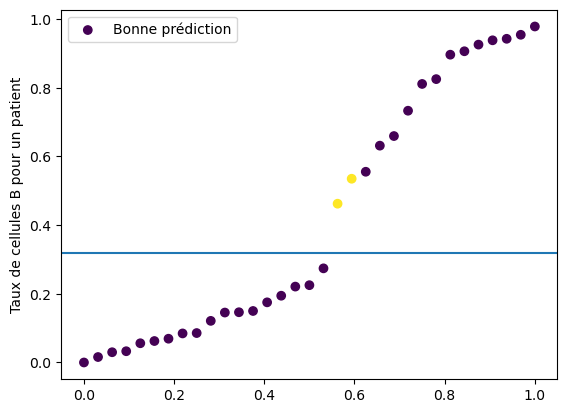

In [214]:
plt.figure()
plt.scatter(np.linspace(0,1,33), taux_final['taux_cellules_B'], c=taux_final['is_diff'])
plt.axhline(0.32)
plt.ylabel("Taux de cellules B pour un patient")
plt.legend(["Bonne prédiction"])
